### Solution 2.1

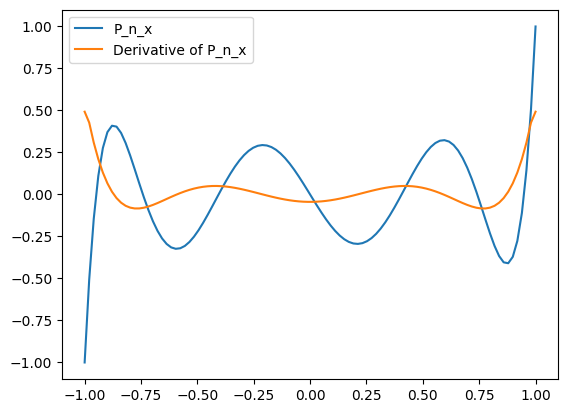

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def legendre(x, n):
    if n == 0:
        return 1
    elif n==1:
        return x
    else:
        P_n_x = ((2*n)-1)*(1/n)*x*legendre(x,n-1)+(1-n)*(1/n)*legendre(x,n-2)
    
    return P_n_x

#matplotlib
import matplotlib.pyplot as plt
x = np.linspace(-1,1,100)
plt.plot(x, legendre(x, 7),label = "P_n_x")
plt.legend()

#Gradient 
y = np.linspace(-1,1,100)
plt.plot(y, np.gradient(legendre(y, 7)),label = "Derivative of P_n_x") 
plt.legend()

In [2]:
x = np.linspace(-1,1,120)
legendre(x, 16)

array([ 1.00000000e+00, -2.70757084e-01, -3.64618437e-01, -8.94494466e-02,
        1.75562914e-01,  2.98189300e-01,  2.74344394e-01,  1.54159868e-01,
       -7.77925029e-04, -1.39302754e-01, -2.29201989e-01, -2.57815856e-01,
       -2.28457670e-01, -1.55155819e-01, -5.72847685e-02,  4.50247419e-02,
        1.34281470e-01,  1.97739206e-01,  2.28315506e-01,  2.24538259e-01,
        1.89782248e-01,  1.31061625e-01,  5.76195284e-02, -2.04849431e-02,
       -9.36408168e-02, -1.53698399e-01, -1.94675786e-01, -2.13143066e-01,
       -2.08300848e-01, -1.81793720e-01, -1.37314993e-01, -8.00673416e-02,
       -1.61456196e-02,  4.80955259e-02,  1.06634359e-01,  1.54290765e-01,
        1.87118830e-01,  2.02663889e-01,  2.00077034e-01,  1.80091337e-01,
        1.44873660e-01,  9.77735327e-02,  4.29958421e-02, -1.47728547e-02,
       -7.07538543e-02, -1.20452387e-01, -1.59994023e-01, -1.86399663e-01,
       -1.97782851e-01, -1.93459346e-01, -1.73965221e-01, -1.40986028e-01,
       -9.72052719e-02, -

### Solution 2.2

In [5]:
# Find the intervals using bisection/root-sign-change method
def find_intervals(n):
    # Finds the interval of roots of legendre polynomial
    q = np.linspace(-1,1,100)
    left_root = []
    right_root = []
    intervals = []
    for i in range(99):
        if np.sign(legendre(q[i],n)) == -1 * np.sign(legendre(q[i+1],n)):
            left_root.append(q[i])
            right_root.append(q[i+1])
    for i in range(len(right_root)):
        intervals.append((left_root[i], right_root[i]))
    
    return intervals


In [6]:
# Find the intervals containing roots P16
find_intervals(16)

[(-1.0, -0.9797979797979798),
 (-0.9595959595959596, -0.9393939393939394),
 (-0.8787878787878788, -0.8585858585858586),
 (-0.7575757575757576, -0.7373737373737373),
 (-0.6363636363636364, -0.6161616161616161),
 (-0.4747474747474747, -0.4545454545454545),
 (-0.2929292929292928, -0.2727272727272727),
 (-0.11111111111111105, -0.09090909090909083),
 (0.09090909090909105, 0.11111111111111116),
 (0.27272727272727293, 0.29292929292929304),
 (0.4545454545454546, 0.4747474747474749),
 (0.6161616161616164, 0.6363636363636365),
 (0.7373737373737375, 0.7575757575757578),
 (0.8585858585858588, 0.8787878787878789),
 (0.9393939393939394, 0.9595959595959598),
 (0.9797979797979799, 1.0)]

In [7]:
import numpy as np

def find_root(f, a, b, tol,n): 
    # approximates a root, R, of f bounded 
    # by a and b to within tolerance 
    # | f(m) | < tol with m the midpoint 
    # between a and b Recursive implementation
    
    # check if a and b bound a root
    if np.sign(f(a,n)) == np.sign(f(b,n)):
        raise Exception(
         "The scalars a and b do not bound a root")
        
    # get midpoint
    m = (a + b)/2
    
    if np.abs(f(m,n)) < tol:
        # stopping condition, report m as root
        return m
    elif np.sign(f(a,n)) == np.sign(f(m,n)):
        # case where m is an improvement on a. 
        # Make recursive call with a = m
        return find_root(f, m, b, tol,n)
    elif np.sign(f(b,n)) == np.sign(f(m,n)):
        # case where m is an improvement on b. 
        # Make recursive call with b = m
        return find_root(f, a, m, tol,n)

In [10]:
# Given a lengendre polynomial of degree n of
#produce the output should be an nx1 array containing the ordered n roots 

def legendre_roots(n):
    roots = []
    intervals = find_intervals(n)
    tol = 10**-10
    for a,b in intervals:
        roots.append(find_root(legendre, a, b, tol,n))
    return roots

In [11]:
legendre_roots(16)

[-0.9894009349924144,
 -0.9445750230753964,
 -0.8656312023863345,
 -0.7554044083438134,
 -0.6178762443890475,
 -0.4580167776556929,
 -0.28160355078301036,
 -0.09501250983789705,
 0.09501250983789725,
 0.2816035507830106,
 0.458016777655693,
 0.6178762443890478,
 0.7554044083438136,
 0.8656312023863347,
 0.9445750230753964,
 0.9894009349924147]